# 2-sigma financial data analysis
This notebook explores the financial data provided by 2sigma in the Kaggle contest. Explores the data and provides some insight on which financial instruments to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Load the data
myRawDf = pd.read_hdf('train.h5', 'train')

The data is structured with time and id time series. Let's explore a bit those time series to understand the structure of the data

In [2]:
# Check the time base
myTimebase = np.array(myRawDf.groupby('timestamp').count().index)
print 'There are ' + str(len(myTimebase)) + ' time steps'
print 'The mean step size is ' + str(np.diff(myTimebase).mean())
print 'The std of the step size is ' + str(np.diff(myTimebase).std())

There are 1813 time steps
The mean step size is 1.0
The std of the step size is 0.0


Thus we see that the timebase is regular with increments of 1 units (whatever it is, seconds or months, does not matter).

In [13]:
def getCategory (aStr):
    myPos = aStr.find('_')
    if myPos != -1 :
        return aStr[:myPos]
    else:
        return aStr
# Get the category of the features
myCategories = np.unique(np.array(myRawDf.columns.map(getCategory)))
myDf =  myRawDf.set_index(['id', 'timestamp'])

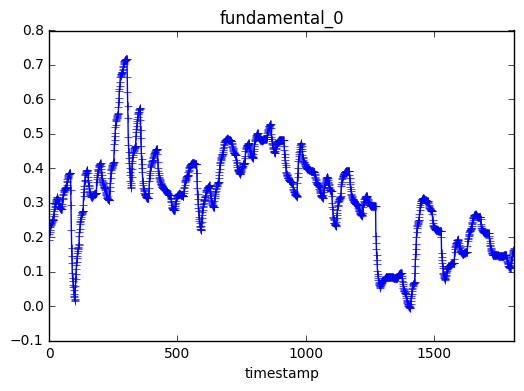

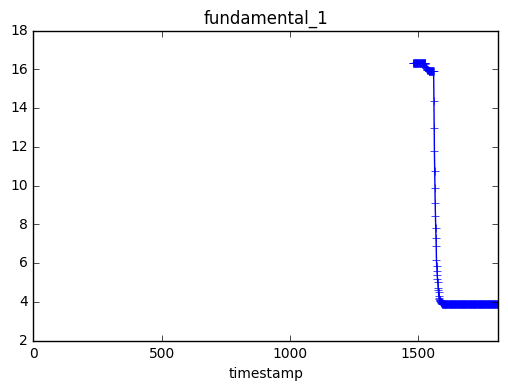

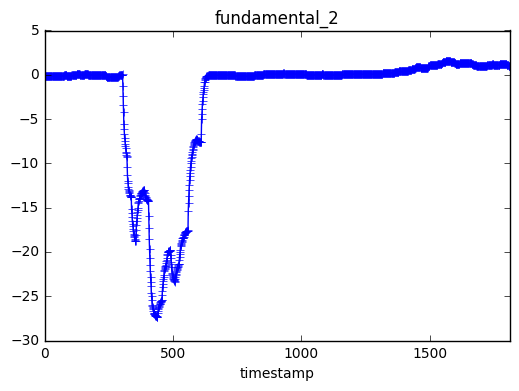

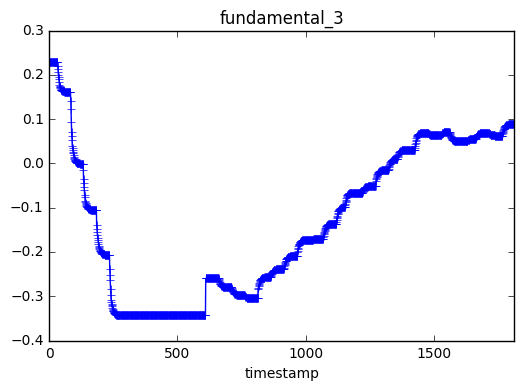

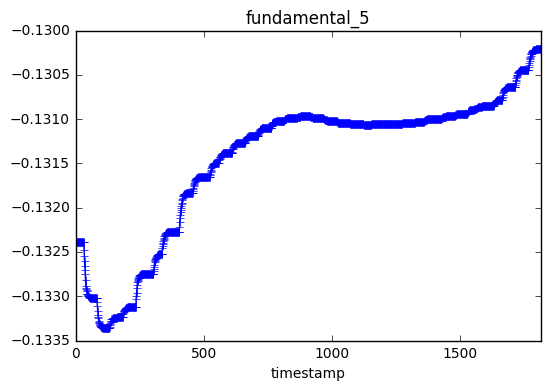

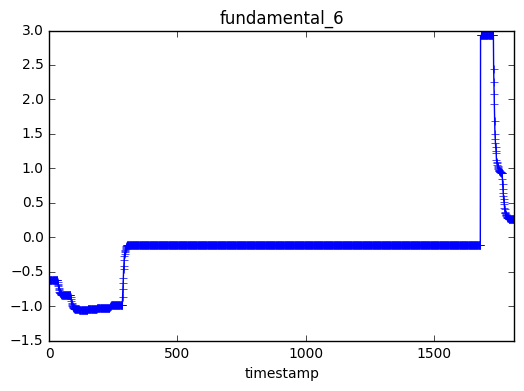

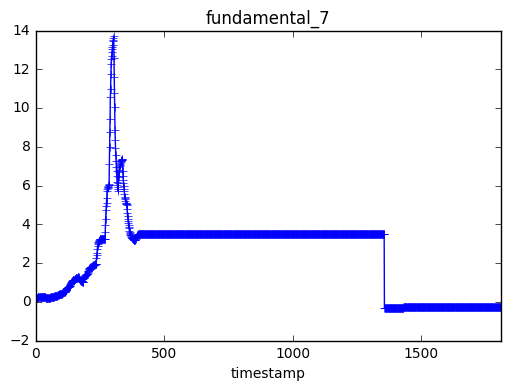

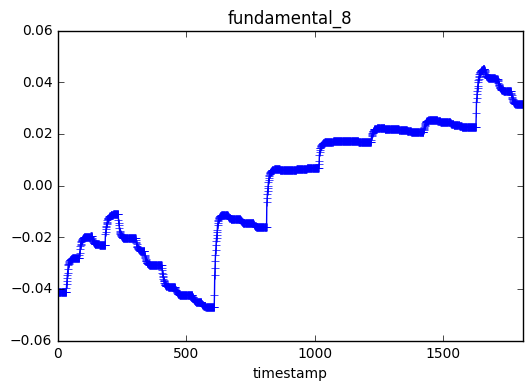

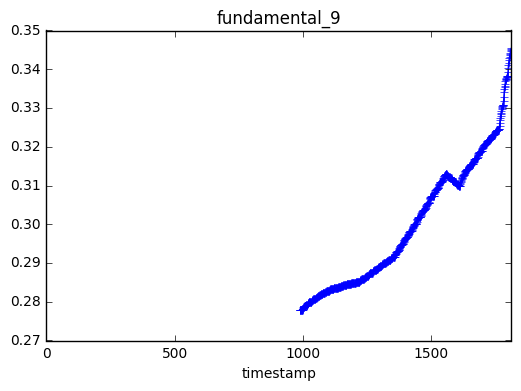

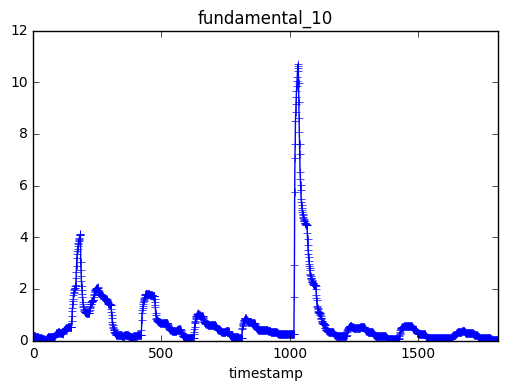

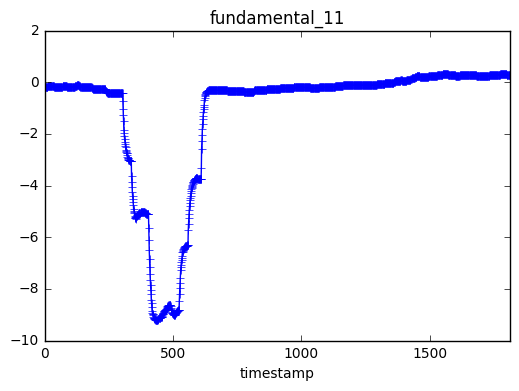

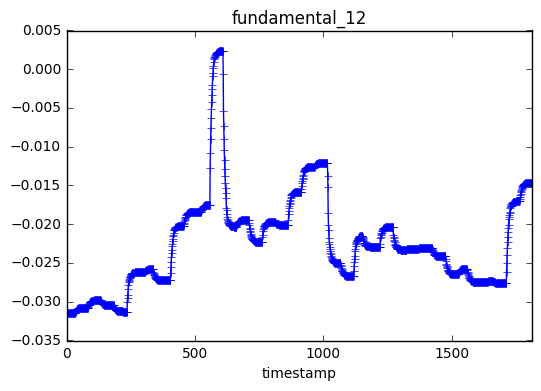

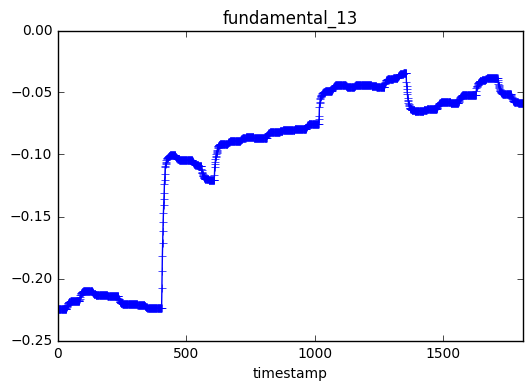

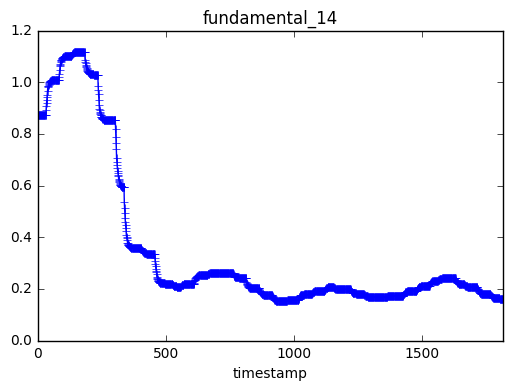

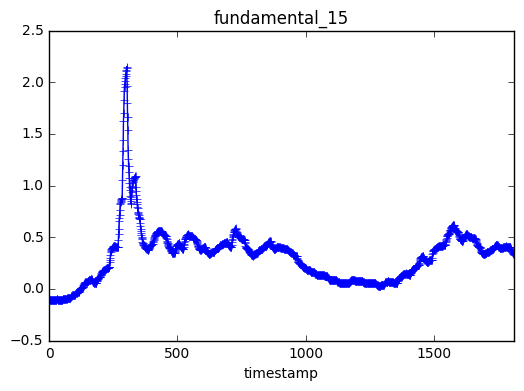

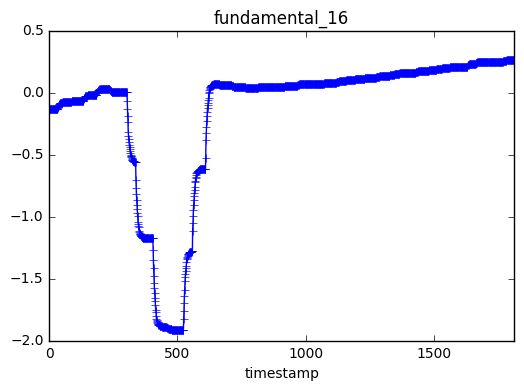

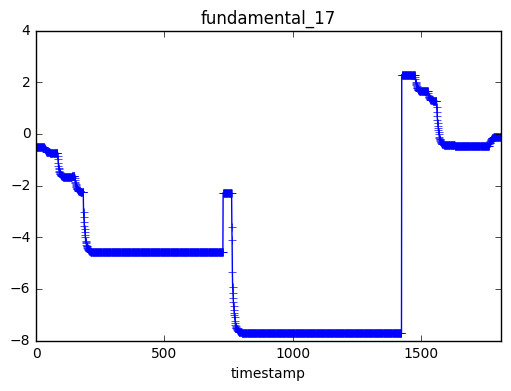

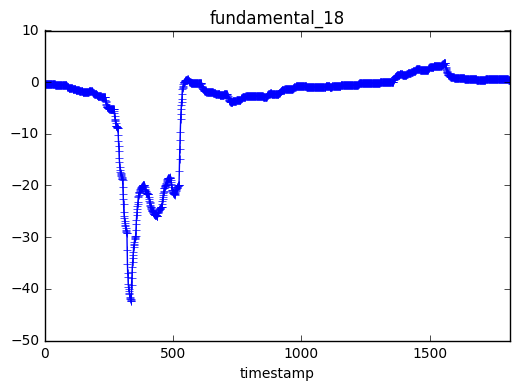

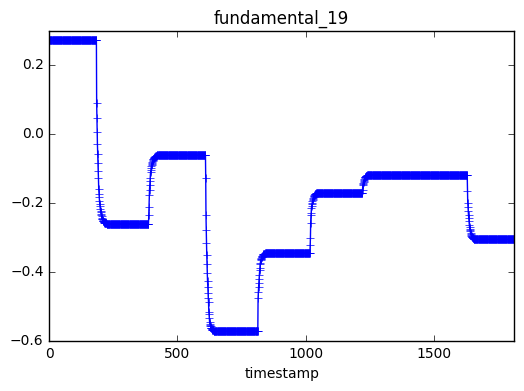

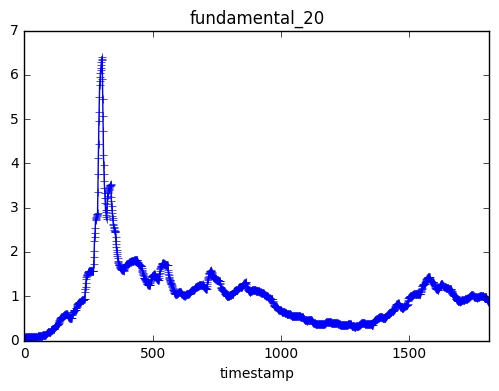

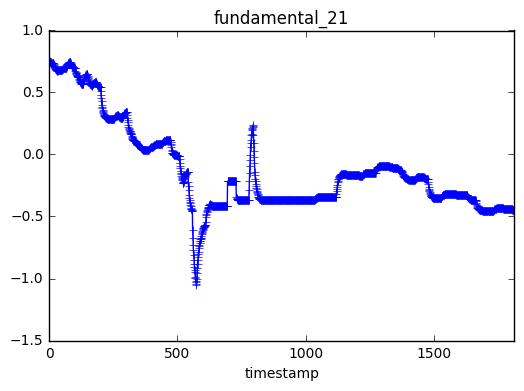

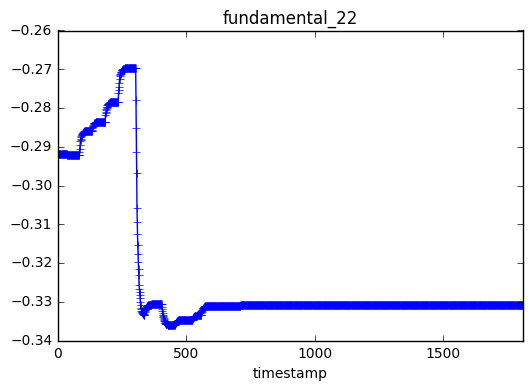

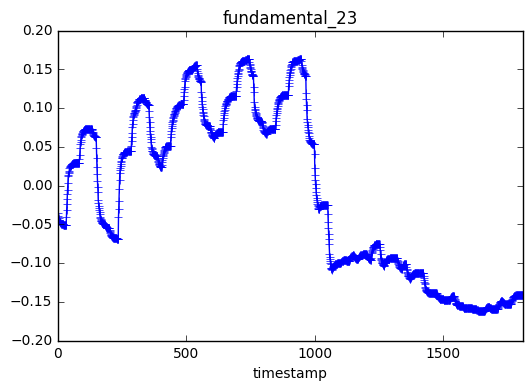

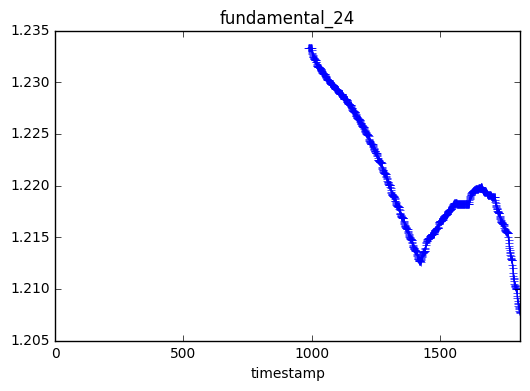

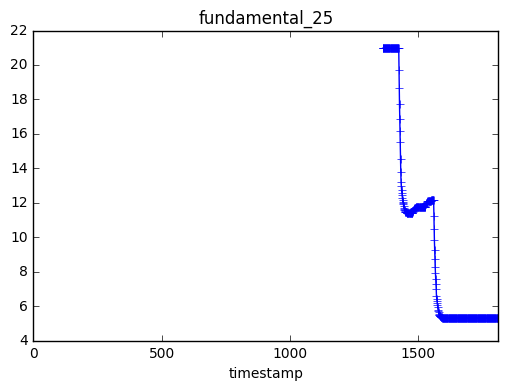

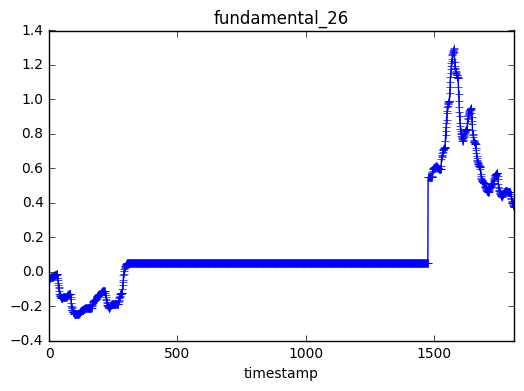

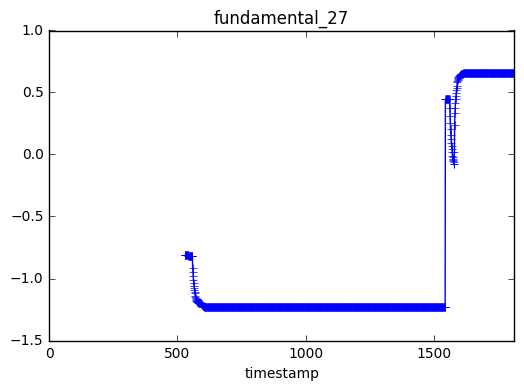

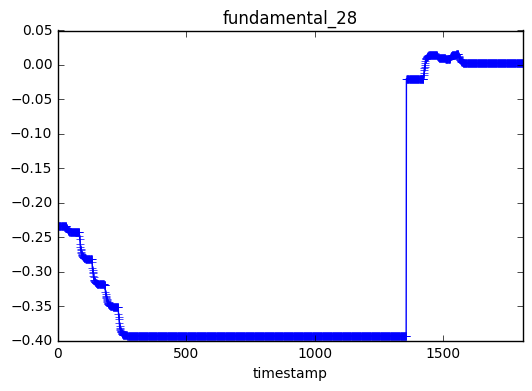

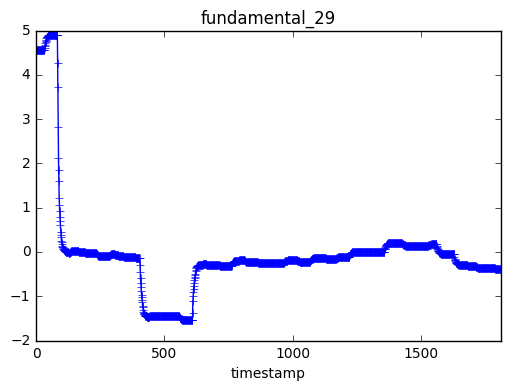

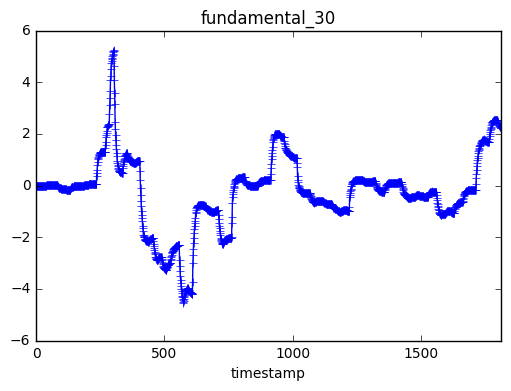

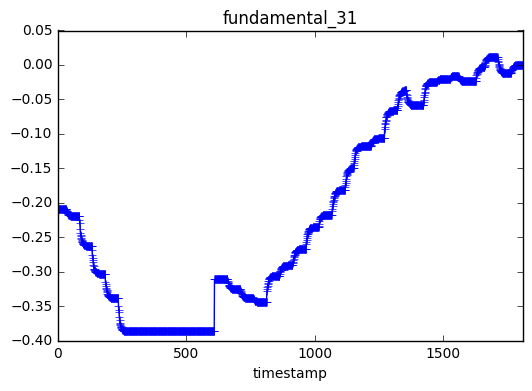

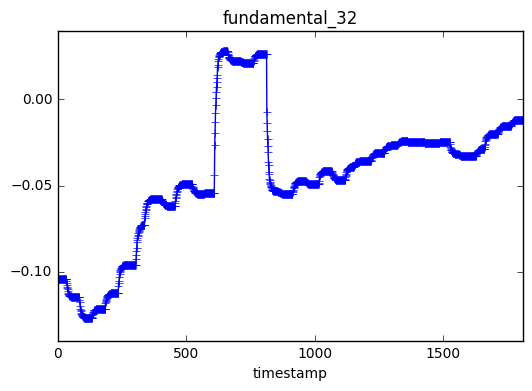

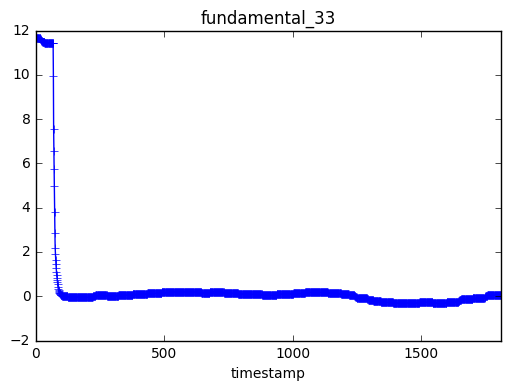

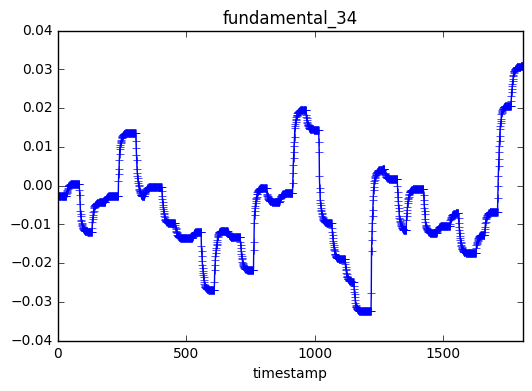

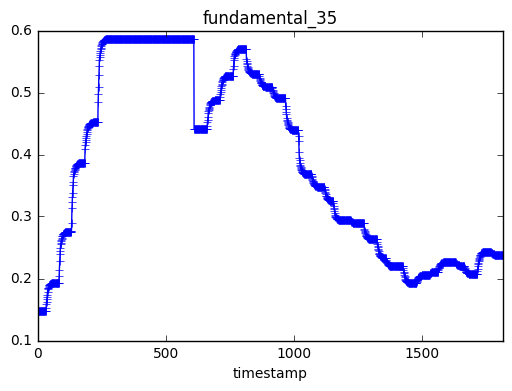

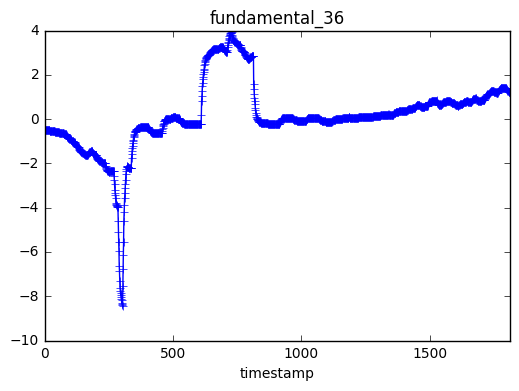

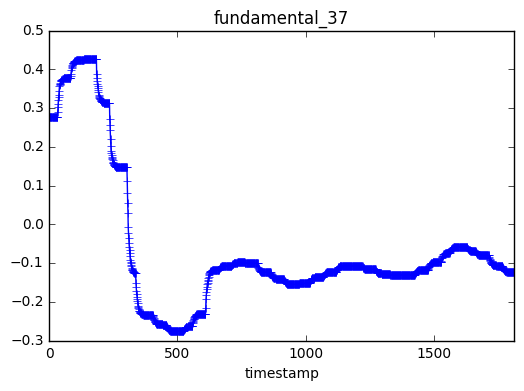

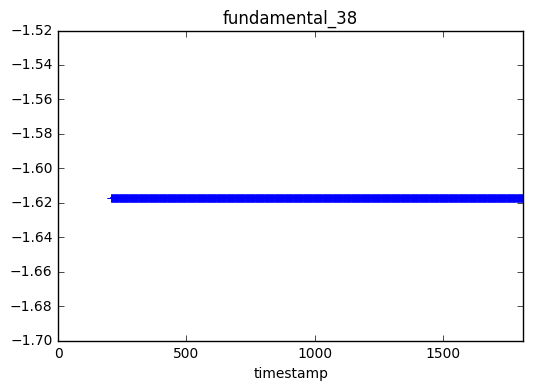

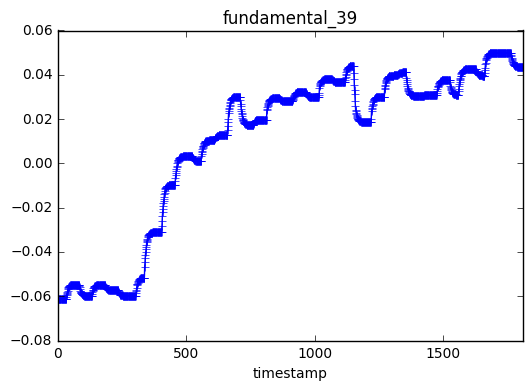

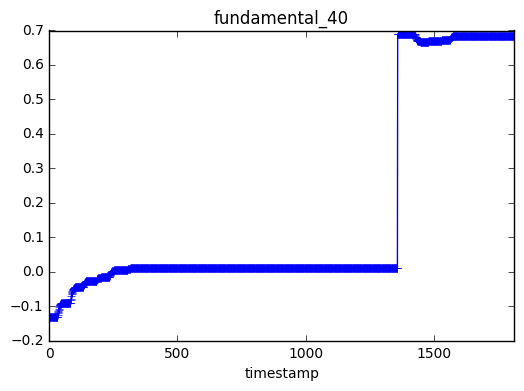

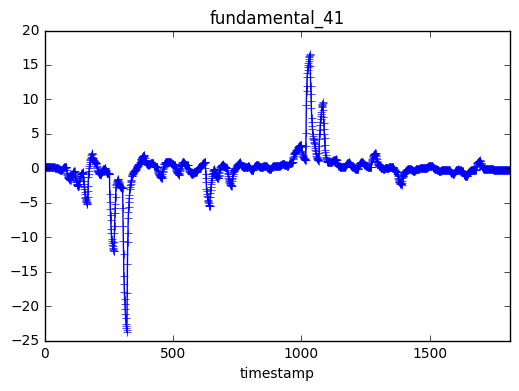

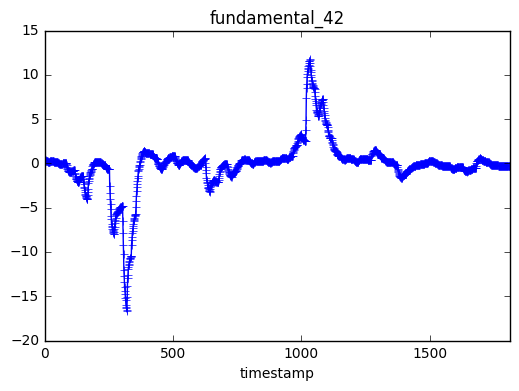

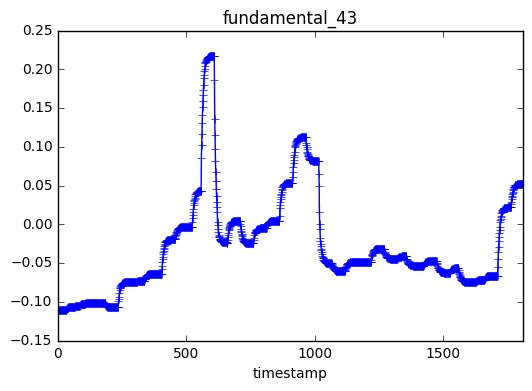

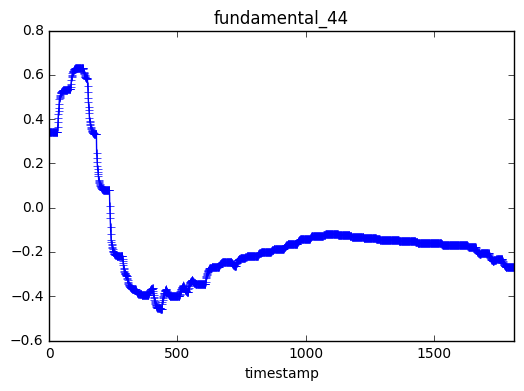

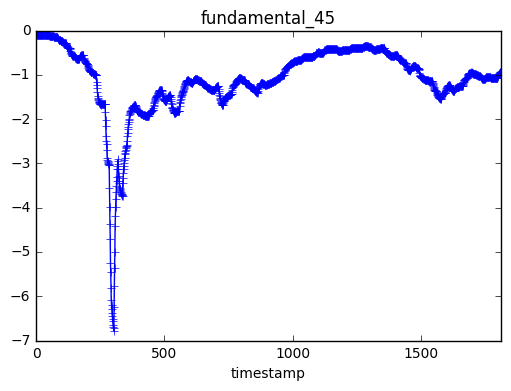

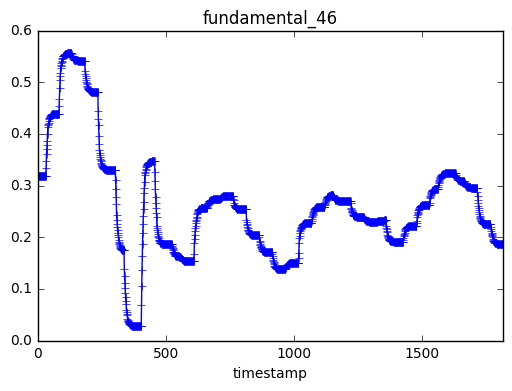

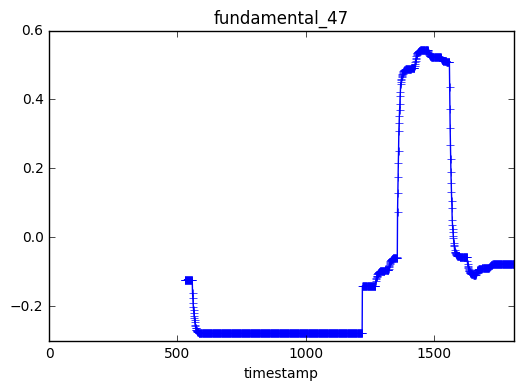

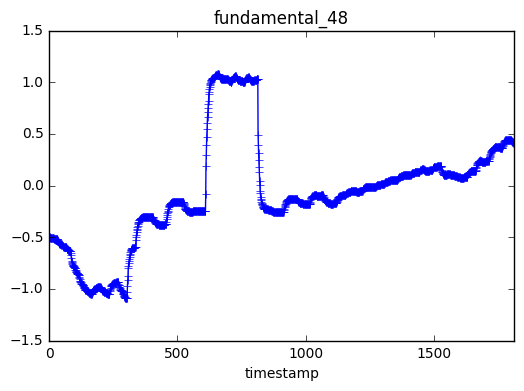

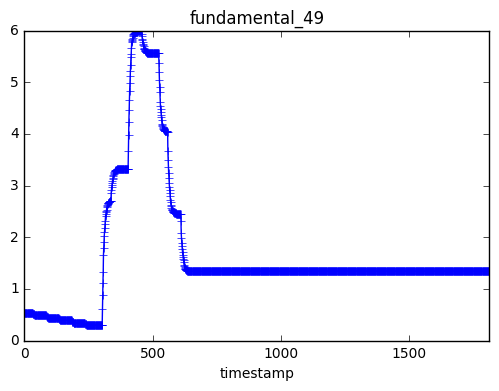

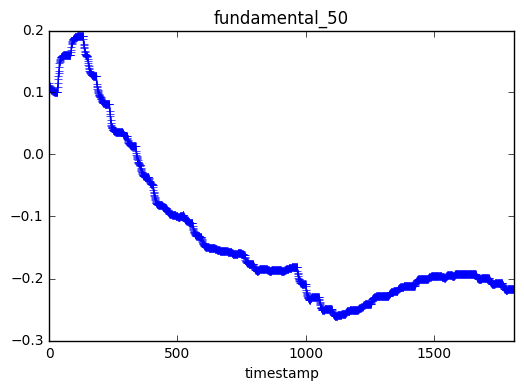

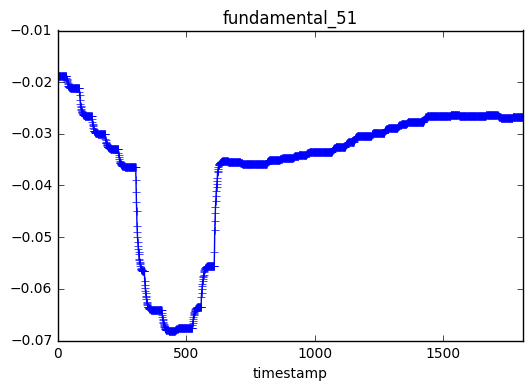

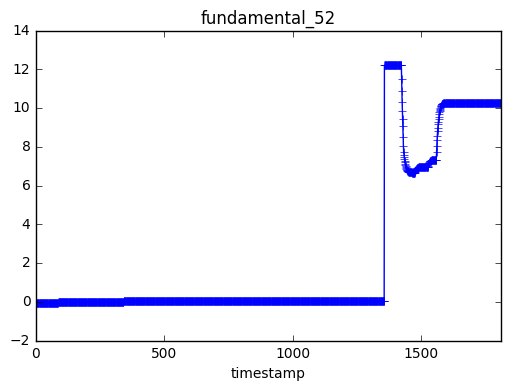

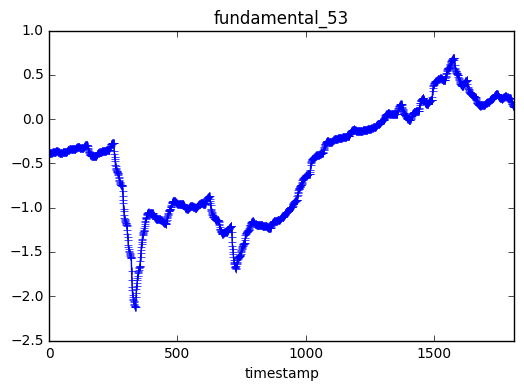

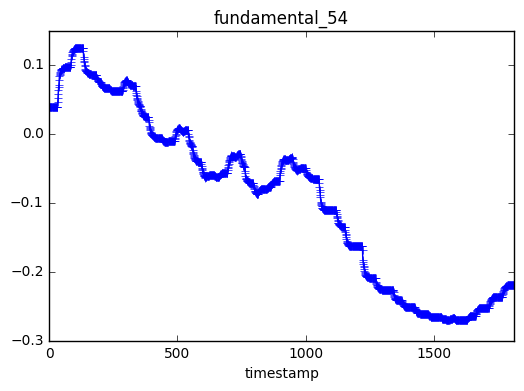

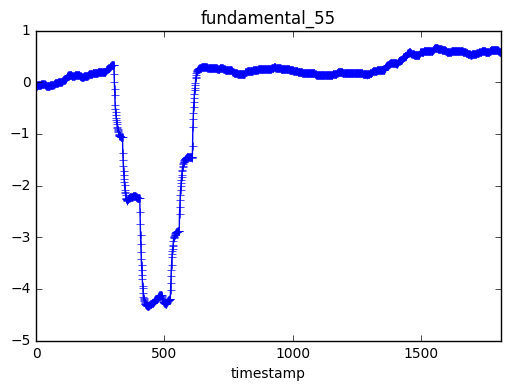

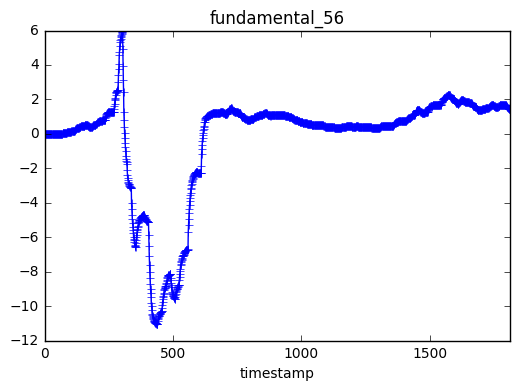

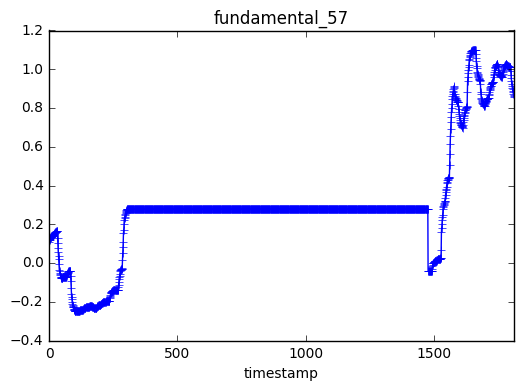

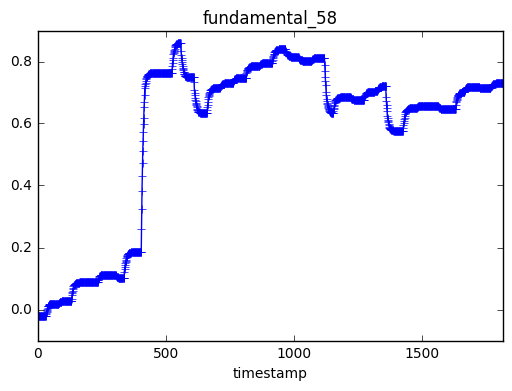

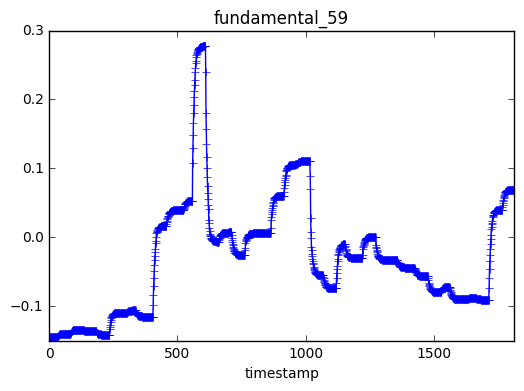

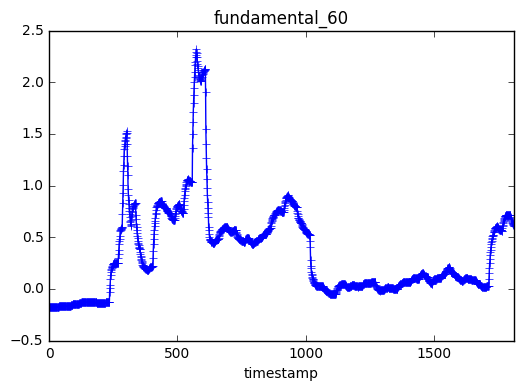

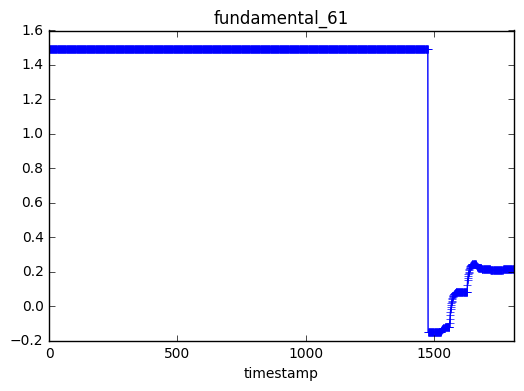

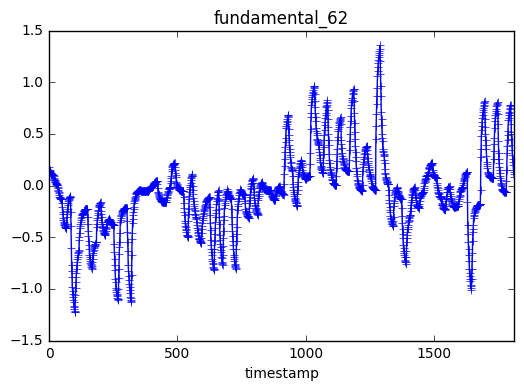

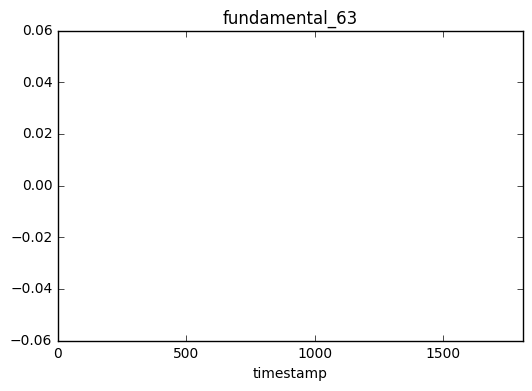

In [48]:
# Chop per categories and and plot
ID = 95
for myCat in myDf.columns:
    if 'fundamental' in myCat:
        myDf[myCat].loc[ID].plot(marker='+')
        plt.title(myCat)
        plt.show()

In [47]:
myDf.loc[[10,11]]

KeyError: 'MultiIndex Slicing requires the index to be fully lexsorted tuple len (1), lexsort depth (0)'